### Трифонов Сергей

# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 13s 3us/step


## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

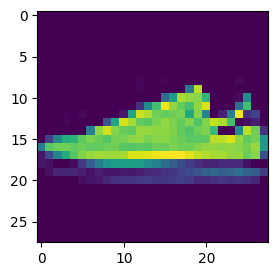

In [19]:
import matplotlib.pyplot as plt
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(image, label):
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.grid(False)
    plt.show()

sneaker_index = list(y_train).index(7)

plot_image(x_train[sneaker_index], y_train[sneaker_index])

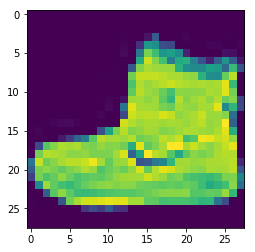

## Предобработка

**Нормализуйте данные X_train и X_test **

255

In [20]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [22]:
import numpy as np

x_train_reshaped = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
x_test_reshaped = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])


**Преобразуйте  y_train и y_test в one_hot представления **

In [23]:
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]


## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [25]:
num_epochs = 10
history = model.fit(x_train_normalized, y_train_one_hot, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4411 - accuracy: 0.8434 - val_loss: 0.3188 - val_accuracy: 0.8857
Epoch 2/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2942 - accuracy: 0.8941 - val_loss: 0.2883 - val_accuracy: 0.8967
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2485 - accuracy: 0.9105 - val_loss: 0.2684 - val_accuracy: 0.9035
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2198 - accuracy: 0.9212 - val_loss: 0.2642 - val_accuracy: 0.9060
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1968 - accuracy: 0.9281 - val_loss: 0.2814 - val_accuracy: 0.9044
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1766 - accuracy: 0.9349 - val_loss: 0.2786 - val_accuracy: 0.9057
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1623 - accuracy: 0.9425 - val_loss: 0.2736 -

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

['loss', 'acc']

In [27]:
from sklearn.metrics import classification_report
import numpy as np


y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test_one_hot, axis=1)

class_report = classification_report(y_true, y_pred_classes)

print(class_report)


313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.81      0.84      1000
           3       0.87      0.94      0.91      1000
           4       0.90      0.74      0.81      1000
           5       0.99      0.98      0.98      1000
           6       0.69      0.77      0.73      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели